In [1]:
#Importing the Libraries
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
import math
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model


In [2]:
TRAIN_DATA_PATH = 'NASA/MC2.csv'

data = pd.read_csv(TRAIN_DATA_PATH)
nameOfHeadersWithLable = data.columns.values
display(data)

,LOC_BLA0K,BRA0CH_COU0T,CALL_PAIRS,LOC_CODE_A0D_COMME0T,LOC_COMME0TS,CO0DITIO0_COU0T,C1CLOMATIC_COMPLEXIT1,C1CLOMATIC_DE0SIT1,DECISIO0_COU0T,DECISIO0_DE0SIT1,...,0ODE_COU0T,0ORMALIZED_C1LOMATIC_COMPLEXIT1,0UM_OPERA0DS,0UM_OPERATORS,0UM_U0IQUE_OPERA0DS,0UM_U0IQUE_OPERATORS,0UMBER_OF_LI0ES,PERCE0T_COMME0TS,LOC_TOTAL,Defective
0,2,3,0,2,7,4,2,0.18,2,2.00,...,6,0.09,11,15,6,8,22,50.00,11,0
1,1,3,1,1,0,4,2,0.13,2,2.00,...,7,0.11,12,19,8,10,18,6.67,15,0
2,6,5,1,4,5,8,3,0.20,4,2.00,...,10,0.10,25,38,12,11,29,45.00,15,0
3,6,5,1,4,3,8,3,0.20,4,2.00,...,10,0.12,26,38,10,11,26,38.89,15,0
4,2,3,0,0,1,4,2,0.29,2,2.00,...,6,0.17,7,13,5,9,12,12.50,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,14,24,8,0,14,30,15,0.25,14,2.14,...,36,0.17,62,100,41,28,89,19.18,59,1
121,26,31,7,9,21,60,16,0.18,30,2.00,...,69,0.12,241,237,64,19,136,27.78,87,1
122,19,13,3,11,19,24,7,0.10,12,2.00,...,30,0.06,215,224,73,17,108,34.48,68,0
123,5,3,3,7,3,4,2,0.08,2,2.00,...,10,0.06,77,82,36,12,35,35.71,25,0


In [3]:
# transform data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
reduced_df = pd.DataFrame(scaled, columns=nameOfHeadersWithLable)
reduced_df.to_csv('FirstlyScaledData.csv')
# display(reduced_df)
# display(scaled)

data2 = pd.read_csv('FirstlyScaledData.csv')
y = data2.Defective
X = data2.drop('Defective', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

nameOfHeaders = X_train.columns.values

In [4]:
# AutoEncoder Model Preparation
n_inputs = X.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)


In [5]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense (Dense)               (None, 80)                3280      
                                                                 
 batch_normalization (BatchN  (None, 80)               320       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                             

In [7]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,y_test))
# # plot loss
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
7/7 - 1s - loss: 0.7550 - accuracy: 0.0000e+00 - val_loss: 2.1190 - val_accuracy: 0.0000e+00 - 1s/epoch - 178ms/step
Epoch 2/50
7/7 - 0s - loss: 0.4711 - accuracy: 0.0000e+00 - val_loss: 1.2486 - val_accuracy: 0.0000e+00 - 53ms/epoch - 8ms/step
Epoch 3/50
7/7 - 0s - loss: 0.3451 - accuracy: 0.0200 - val_loss: 0.9118 - val_accuracy: 0.0000e+00 - 41ms/epoch - 6ms/step
Epoch 4/50
7/7 - 0s - loss: 0.2874 - accuracy: 0.0200 - val_loss: 0.6328 - val_accuracy: 0.0000e+00 - 38ms/epoch - 5ms/step
Epoch 5/50
7/7 - 0s - loss: 0.2670 - accuracy: 0.0200 - val_loss: 0.5451 - val_accuracy: 0.0000e+00 - 40ms/epoch - 6ms/step
Epoch 6/50
7/7 - 0s - loss: 0.2458 - accuracy: 0.0200 - val_loss: 0.4964 - val_accuracy: 0.0000e+00 - 38ms/epoch - 5ms/step
Epoch 7/50
7/7 - 0s - loss: 0.2166 - accuracy: 0.0000e+00 - val_loss: 0.4434 - val_acc

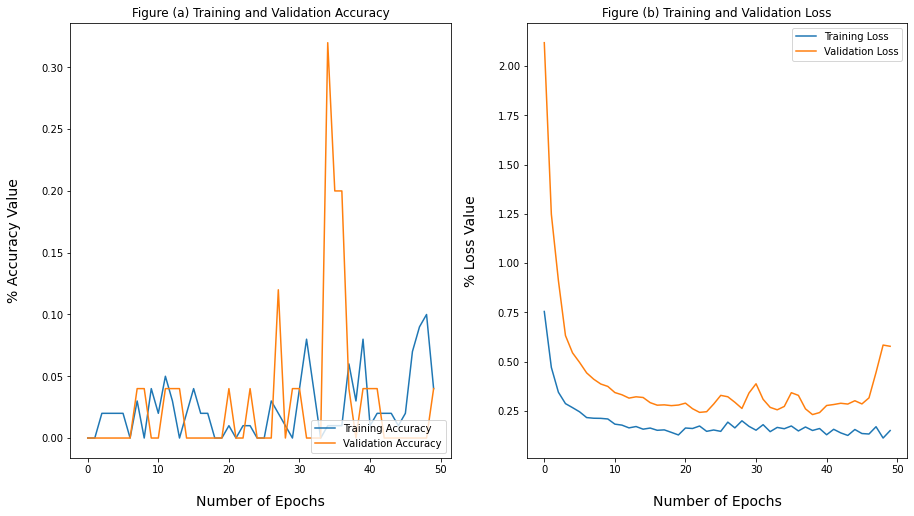

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.xlabel('Number of Epochs', fontsize=14, labelpad=20)
plt.ylabel('% Accuracy Value', fontsize=14, labelpad=20)
plt.legend(loc='lower right')
plt.title('Figure (a) Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.xlabel('Number of Epochs', fontsize=14, labelpad=20)
plt.ylabel('% Loss Value', fontsize=14, labelpad=20)
plt.legend(loc='upper right')
plt.title('Figure (b) Training and Validation Loss')
plt.show()

# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [9]:
#Building a Base Model to compare the performance after compressing the data using Encoder model.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
# define model
model = RandomForestClassifier()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8


In [10]:
#Compressing the input data using Encoder Model and fitting it on the Logistic Regression model.
# load the model from file
encoder = load_model('encoder.h5')

encoder.compile(optimizer='adam', loss='mse')

# encode the train data
X_train_encode = encoder.predict(X_train)

# encode the test data
X_test_encode = encoder.predict(X_test)

# nameOfHeaders = X_train.columns.values
# reduced_df = pd.DataFrame(encoder.predict(x_test), columns=nameOfHeaders)

# reduced_df.to_csv('PredictedJM1OnTestData.csv')


# define the model
random_forest = RandomForestClassifier(max_depth=50)
# fit the model on the training set
random_forest.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = random_forest.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

1/1 [==============================] - 0s 16ms/step
0.84


In [11]:
print('Optimal number of features: {}'.format(random_forest.n_features_))

Optimal number of features: 20


C:\Users\Zbook\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


array([0.14408588, 0.02026882, 0.03011754, 0.05781072, 0.08078615,
       0.02912169, 0.06344652, 0.03575628, 0.02984244, 0.03591358,
       0.03851732, 0.01943711, 0.02914656, 0.08727627, 0.04378059,
       0.02588364, 0.06355224, 0.04646514, 0.04369923, 0.07509229])

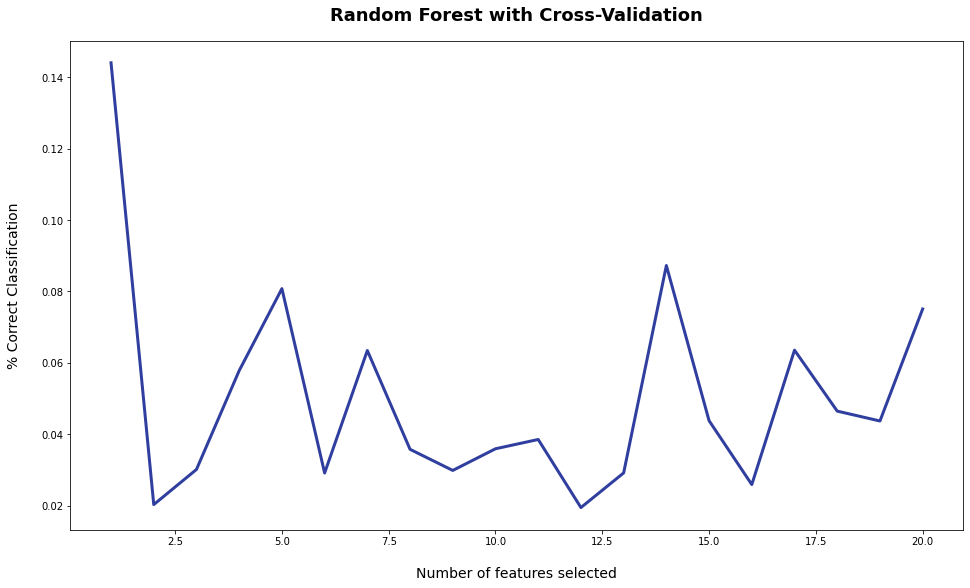

In [12]:
display(random_forest.feature_importances_)
plt.figure(figsize=(16, 9))
plt.title('Random Forest with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(random_forest.feature_importances_) + 1), random_forest.feature_importances_, color='#303F9F', linewidth=3)

plt.show()